# Pizza Sales Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pizza_df = pd.read_excel('Data Model - Pizza Sales.xlsx')

# Dataset Description

The dataset contains information about pizza sales, including details such as pizza ID, order ID, pizza name ID, quantity, order date, order time, unit price, total price, pizza size, pizza category, pizza ingredients, and pizza name. Each column represents a specific attribute related to the pizza sales data.The dataset encompasses 48621 orders of pizza and customer transactions. This pizza sales dataset make up 12 relevant features:

In [4]:
pizza_df.sample(3)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
39263,39264,17296,ital_supr_l,1,2015-10-21,13:58:34,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
40847,40848,17995,classic_dlx_m,1,2015-11-03,12:17:57,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
45062,45063,19810,ckn_pesto_l,1,2015-12-03,14:20:52,20.75,20.75,L,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli...",The Chicken Pesto Pizza


In [5]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [6]:
pizza_df.duplicated().sum()

0

In [7]:
pizza_df.describe(include='all')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12444\1176626154.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  pizza_df.describe(include='all')


,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
count,48620.000000,48620.000000,48620,48620.000000,48620,48620,48620.000000,48620.000000,48620,48620,48620,48620
unique,NaN,NaN,91,NaN,358,16382,NaN,NaN,5,4,32,32
top,NaN,NaN,big_meat_s,NaN,2015-11-26 00:00:00,12:32:00,NaN,NaN,L,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
freq,NaN,NaN,1811,NaN,261,26,NaN,NaN,18526,14579,2416,2416
first,NaN,NaN,NaN,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2015-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,24310.500000,10701.479761,NaN,1.019622,NaN,NaN,16.494132,16.821474,NaN,NaN,NaN,NaN
std,14035.529381,6180.119770,NaN,0.143077,NaN,NaN,3.621789,4.437398,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,1.000000,NaN,NaN,9.750000,9.750000,NaN,NaN,NaN,NaN
25%,12155.750000,5337.000000,NaN,1.000000,NaN,NaN,12.750000,12.750000,NaN,NaN,NaN,NaN


# IMPORTANT STATISTICS

## Total Revenue

In [9]:
total_revenue = (pizza_df['total_price']).sum()
print("Total Revenue:", total_revenue)

Total Revenue: 817860.05


## Average Order value

In [10]:
avg_order_value = pizza_df.groupby('order_id')['total_price'].sum().mean()
print("Average Order Value:", avg_order_value)

Average Order Value: 38.30726229508196


## Total Pizzas Sold

In [12]:
total_pizzas_sold = pizza_df['quantity'].sum()
print("Total Pizzas Sold:", total_pizzas_sold)

Total Pizzas Sold: 49574


## Total orders

In [13]:
total_orders = len(pizza_df.groupby('order_id').count())
print("Total Orders:", total_orders)

Total Orders: 21350


## Average Pizzas per order

In [14]:
avg_pizzas_per_order = pizza_df['quantity'].sum() / total_orders
print("Average Pizzas per Order:", avg_pizzas_per_order)

Average Pizzas per Order: 2.321967213114754


# SALES PERFORMANCE ANALYSIS

### What is the average unit price and revenue of pizza across different categories?

In [15]:
category_analysis = pizza_df.groupby('pizza_category').agg(
    average_unit_price=('unit_price', 'mean'),
    revenue_per_category=('unit_price', lambda x: (x * pizza_df['quantity']).sum())
).sort_values(by='revenue_per_category', ascending=False)
print("Average Unit Price and Revenue by Category:\n", category_analysis)

Average Unit Price and Revenue by Category:
                 average_unit_price  revenue_per_category
pizza_category                                          
Classic                  14.797490             220053.10
Supreme                  17.363229             208197.00
Chicken                  17.709408             195919.50
Veggie                   16.612639             193690.45


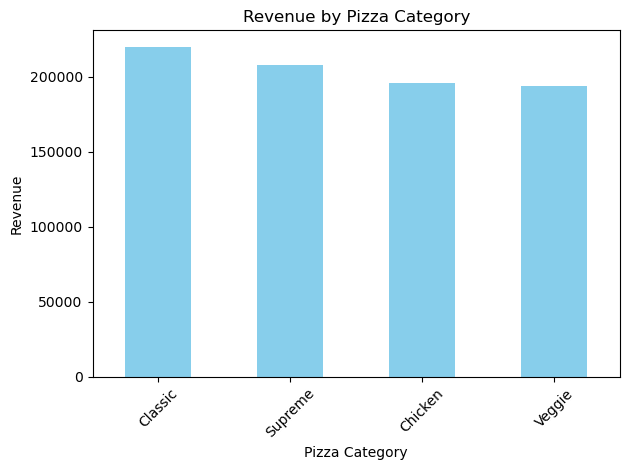

In [16]:
# Revenue by Pizza Category
category_analysis['revenue_per_category'].plot(kind='bar', color='skyblue')
plt.xlabel('Pizza Category')
plt.ylabel('Revenue')
plt.title('Revenue by Pizza Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### What is the average unit price and revenue of pizza across different sizes?

In [17]:
size_analysis = pizza_df.groupby('pizza_size').agg(
    average_unit_price=('unit_price', 'mean'),
    revenue_per_size=('unit_price', lambda x: (x * pizza_df['quantity']).sum())
).sort_values(by='revenue_per_size', ascending=False)
print("Average Unit Price and Revenue by Size:\n", size_analysis)

Average Unit Price and Revenue by Size:
             average_unit_price  revenue_per_size
pizza_size                                      
L                    19.802553         375318.70
M                    15.951219         249382.25
S                    12.364328         178076.50
XL                   25.500000          14076.00
XXL                  35.950000           1006.60


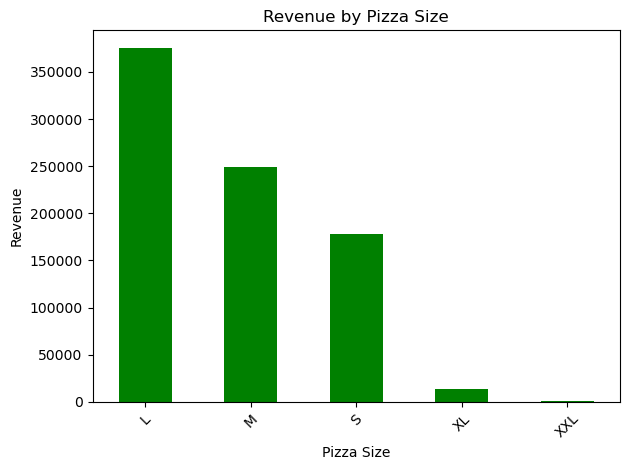

In [18]:
# Revenue by pizza size
size_analysis['revenue_per_size'].plot(kind='bar', color='green')
plt.xlabel('Pizza Size')
plt.ylabel('Revenue')
plt.title('Revenue by Pizza Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### What is the average unit price and revenue of most sold 3 pizzas?

In [19]:
top_pizza_analysis = pizza_df.groupby('pizza_name').agg(
    average_unit_price=('unit_price', 'mean'),
    revenue_per_pizza=('unit_price', lambda x: (x * pizza_df['quantity']).sum())
).nlargest(5, 'revenue_per_pizza')
print("Average Unit Price and Revenue of Top 3 Pizzas:\n", top_pizza_analysis)

Average Unit Price and Revenue of Top 3 Pizzas:
                               average_unit_price  revenue_per_pizza
pizza_name                                                         
The Thai Chicken Pizza                 18.286069           43434.25
The Barbecue Chicken Pizza             17.572934           42768.00
The California Chicken Pizza           17.448523           41409.50
The Classic Deluxe Pizza               15.575952           38180.50
The Spicy Italian Pizza                18.104663           34831.25


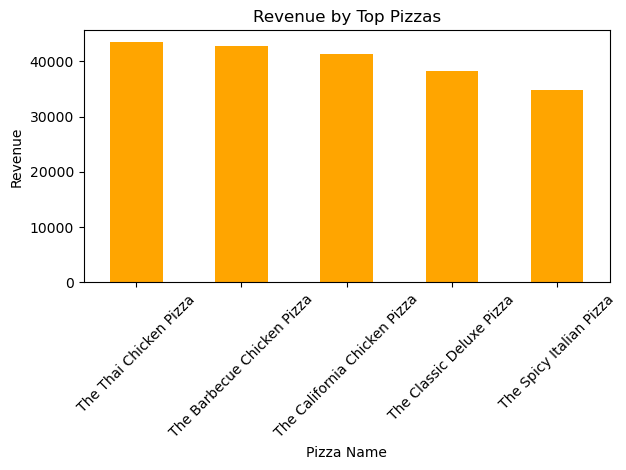

In [20]:
# Revenue by top pizza
top_pizza_analysis['revenue_per_pizza'].plot(kind='bar', color='orange')
plt.xlabel('Pizza Name')
plt.ylabel('Revenue')
plt.title('Revenue by Top Pizzas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## SEASONAL ANALYSIS

### Which days of the week have the highest number of orders?

In [21]:
pizza_df['day_of_week'] = pd.to_datetime(pizza_df['order_date']).dt.strftime('%A')
day_of_week_analysis = pizza_df.groupby('day_of_week')['order_id'].count().sort_values(ascending=False)
print("Highest Number of Orders by Day of Week:\n", day_of_week_analysis)

Highest Number of Orders by Day of Week:
 day_of_week
Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: order_id, dtype: int64


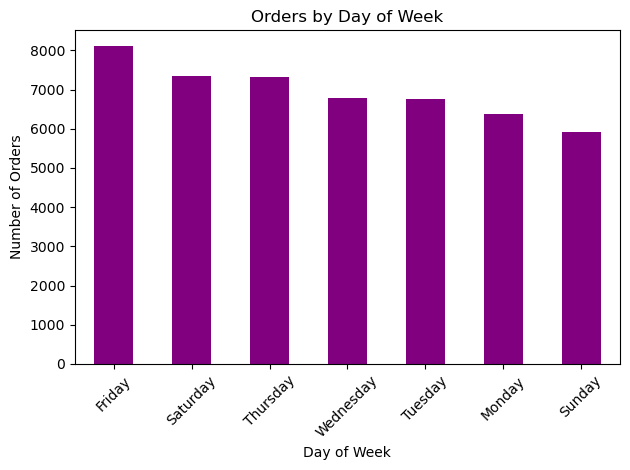

In [22]:
# orders by day of week
day_of_week_analysis.plot(kind='bar', color='purple')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Orders by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### At what time do most of the orders occur?

In [23]:
pizza_df['delivery_time'] = pizza_df['order_time'].astype('string').str.slice(0, 5) 
delivery_time_analysis = pizza_df.groupby('delivery_time')['order_id'].count().nlargest(5)
print("Most Occurring Order Times:\n", delivery_time_analysis)

Most Occurring Order Times:
 delivery_time
13:04    198
12:39    158
12:56    155
12:30    153
12:29    149
Name: order_id, dtype: int64


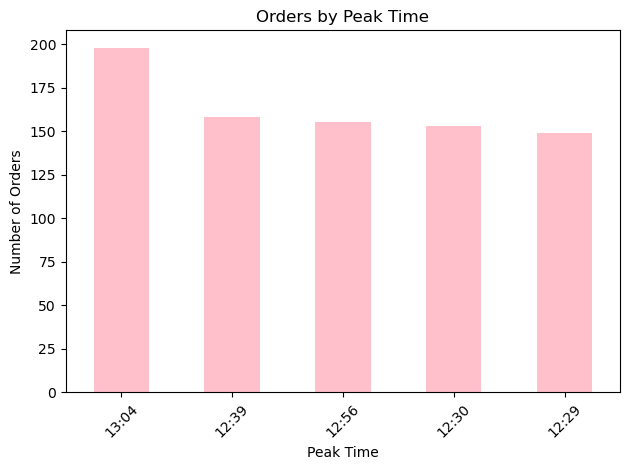

In [24]:
# Orders by Peak time
delivery_time_analysis.plot(kind='bar', color='pink')
plt.xlabel('Peak Time')
plt.ylabel('Number of Orders')
plt.title('Orders by Peak Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Which month has the highest revenue?

In [25]:
month_revenue_analysis = pizza_df.groupby(pd.to_datetime(pizza_df['order_date']).dt.strftime('%B'))['total_price'].sum()
print("Highest Revenue Months:\n", month_revenue_analysis)

Highest Revenue Months:
 order_date
April        68736.80
August       68278.25
December     64701.15
February     65159.60
January      69793.30
July         72557.90
June         68230.20
March        70397.10
May          71402.75
November     70395.35
October      64027.60
September    64180.05
Name: total_price, dtype: float64


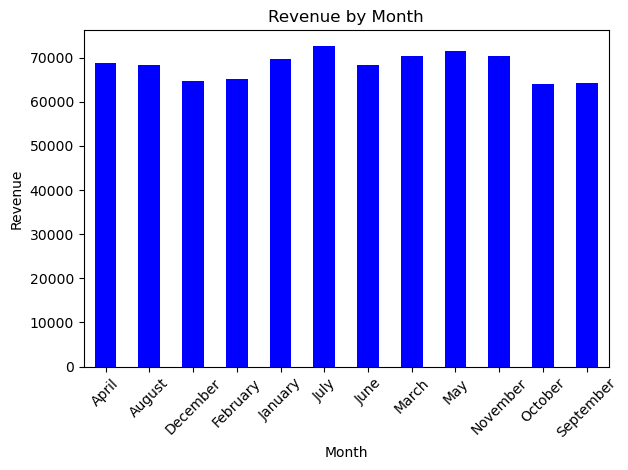

In [26]:
# Renvenue by month
month_revenue_analysis.plot(kind='bar', color='blue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Which season has the highest revenue?

In [27]:
def categorize_season(month):
    if month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Fall'
    else:
        return 'Winter'

In [28]:
pizza_df['season'] = pd.to_datetime(pizza_df['order_date']).dt.strftime('%B').map(categorize_season)
seasonal_revenue_analysis = pizza_df.groupby('season')['total_price'].sum()
print("Season with the Highest Revenue:\n", seasonal_revenue_analysis)

Season with the Highest Revenue:
 season
Fall      198603.00
Spring    210536.65
Summer    209066.35
Winter    199654.05
Name: total_price, dtype: float64


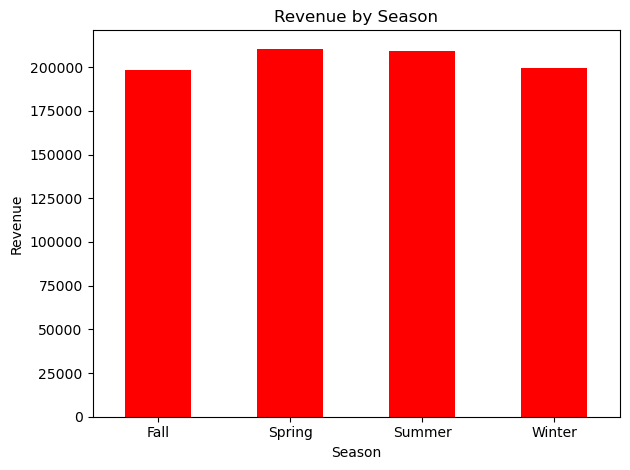

In [29]:
# Revenue by Season
seasonal_revenue_analysis.plot(kind='bar', color='red')
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.title('Revenue by Season')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## CUSTOMER BEHAVIOR ANALYSIS

### Which is the favorite pizza of customers (most ordered pizza)?

In [30]:
favorite_pizza = pizza_df.groupby(['pizza_name', 'pizza_size'])['order_id'].count().idxmax()
print("Favorite Pizza:", favorite_pizza)

Favorite Pizza: ('The Big Meat Pizza', 'S')


### Which pizza is ordered most number of times?

In [31]:
most_ordered_pizza = pizza_df.groupby('pizza_name').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nlargest(3, 'order_count')
print("Most Ordered Pizzas:\n", most_ordered_pizza)

Most Ordered Pizzas:
                             order_count  average_unit_price
pizza_name                                                 
The Classic Deluxe Pizza           2416           15.575952
The Barbecue Chicken Pizza         2372           17.572934
The Hawaiian Pizza                 2370           13.317194


### Which pizza size is preferred by customers?

In [33]:
preferred_pizza_size = pizza_df.groupby('pizza_size').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nlargest(1, 'order_count')
print("Preferred Pizza Size:\n", preferred_pizza_size)

Preferred Pizza Size:
             order_count  average_unit_price
pizza_size                                 
L                 18526           19.802553


### Which pizza category is preferred by customers?

In [34]:
preferred_pizza_category = pizza_df.groupby('pizza_category').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nlargest(1, 'order_count')
print("Preferred Pizza Category:\n", preferred_pizza_category)

Preferred Pizza Category:
                 order_count  average_unit_price
pizza_category                                 
Classic               14579            14.79749


# PIZZA ANALYSIS

### Pizza with least price 

In [35]:
lowest_priced_pizza = pizza_df[['pizza_name', 'unit_price']].sort_values(by='unit_price').iloc[0]
print("Lowest Priced Pizza:\n", lowest_priced_pizza)

Lowest Priced Pizza:
 pizza_name    The Pepperoni Pizza
unit_price                   9.75
Name: 7636, dtype: object


### Pizza with highest price 

In [36]:
highest_priced_pizza = pizza_df[['pizza_name', 'unit_price']].sort_values(by='unit_price', ascending=False).iloc[0]
print("Highest Priced Pizza:\n", highest_priced_pizza)

Highest Priced Pizza:
 pizza_name    The Greek Pizza
unit_price              35.95
Name: 22903, dtype: object


### Number of pizzas per category 

In [37]:
pizzas_per_category = pizza_df['pizza_category'].value_counts()
print("Number of Pizzas per Category:\n", pizzas_per_category)

Number of Pizzas per Category:
 Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: pizza_category, dtype: int64


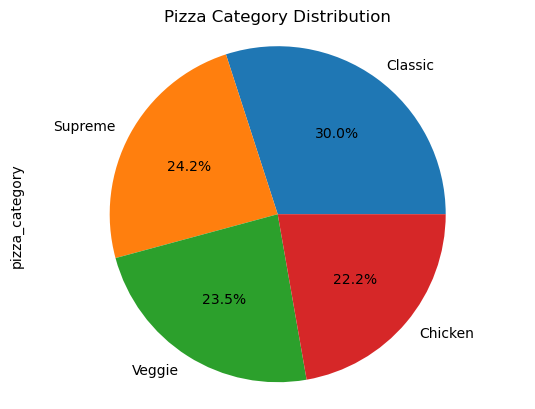

In [38]:
# pizza per category distribution
pizzas_per_category.plot(kind='pie', autopct='%1.1f%%')
plt.title('Pizza Category Distribution')
plt.axis('equal')
plt.show()

### Number of pizzas per pizza_size 

In [39]:
pizzas_per_size = pizza_df['pizza_size'].value_counts()
print("Number of Pizzas per Size:\n", pizzas_per_size)

Number of Pizzas per Size:
 L      18526
M      15385
S      14137
XL       544
XXL       28
Name: pizza_size, dtype: int64


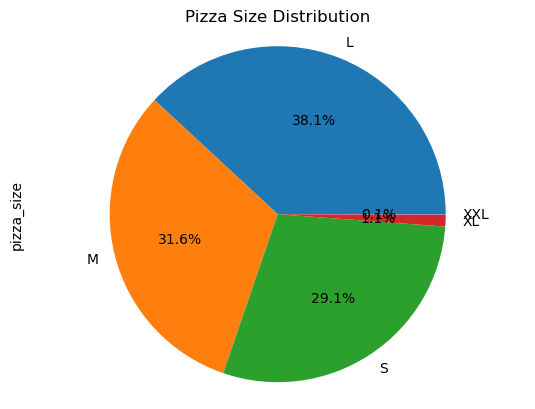

In [40]:
# pizza per size
pizzas_per_size.plot(kind='pie', autopct='%1.1f%%')
plt.title('Pizza Size Distribution')
plt.axis('equal')
plt.show()

### Pizzas with more than one category 

In [41]:
pizzas_with_multiple_categories = pizza_df.groupby('pizza_name').filter(lambda x: x['pizza_category'].nunique() > 1)
print("Pizzas with More Than One Category:\n", pizzas_with_multiple_categories)

Pizzas with More Than One Category:
 Empty DataFrame
Columns: [order_details_id, order_id, pizza_id, quantity, order_date, order_time, unit_price, total_price, pizza_size, pizza_category, pizza_ingredients, pizza_name, day_of_week, delivery_time, season]
Index: []


# Conclusion